Training an Auto-encoder to convert low-quality images into high-quality. We'll be using TensorFlow and Keras. 

### Auto-encoder

Encoder:

In [ ]:
# from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
# from keras.models import Model
# from keras import regularizers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Encoder

n = 256
chan = 3
input_img = Input(shape=(n, n, chan))

#Activation Function - ReLU ( Rectified Linear Unit)
l1 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(input_img)
l2 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l1)
l3 = MaxPooling2D(padding='same')(l2)
l3 = Dropout(0.3)(l3)
l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l3)
l5 = Conv2D(128, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l4)
l6 = MaxPooling2D(padding='same')(l5)
l3 = Dropout(0.5)(l3)
l7 = Conv2D(256, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l6)
encoder = Model(input_img, l7)

/Users/manojkumar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,328 (2.12 MB)

 Trainable params: 555,328 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

Decoder:

In [3]:
# Decoder

l8 = UpSampling2D()(l7)

l9 = Conv2D(128, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l8)
l10 = Conv2D(128, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l9)

l11 = add([l5, l10])
l12 = UpSampling2D()(l11)
l3 = Dropout(0.3)(l3)
l13 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l12)
l14 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l13)

l15 = add([l14, l2])

# chan = 3, for RGB
decoded = Conv2D(chan, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l15)

# Create our network
autoencoder = Model(input_img, decoded)
# You'll understand later what this is
autoencoder_hfenn = Model(input_img, decoded)

In [4]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 128, 128,  │          0 │ conv2d_4[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │    295,040 │ up_sampling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_5[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ conv2d_3[0][0],   │
│                     │ 128)              │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 256, 256,  │          0 │ add[0][0]         │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 256, 256,  │     73,792 │ up_sampling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_7[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256, 256,  │          0 │ conv2d_8[0][0], 

 Total params: 1,110,403 (4.24 MB)

 Trainable params: 1,110,403 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

### Training 

For now we'll simply use a **Mean Squared Error (MSE)** for the loss, we'll see later what this is and if we can go further.

In [5]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

Download the dataset: https://www.kaggle.com/datasets/jessicali9530/stanford-cars-dataset/data

In [6]:
import os

dataset_path = "/Users/manojkumar/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2"
print("Files in dataset directory:", os.listdir(dataset_path))


Files in dataset directory: ['cars_train', '.DS_Store', 'cars_annos.mat', 'cars_test']


In [7]:
import os
import re
from scipy import ndimage, misc
from skimage.transform import resize, rescale
from matplotlib import pyplot
import numpy as np
def train_batches(just_load_dataset=False):
    batches = 256 # Number of images to have at the same time in a batch
    batch = 0 # counter images in the current batch (grows over time and then resets for each batch)
    batch_nb = 0 # counter of current batch index
    max_batches = -1 # If you want to train only on a limited number of images to finish the training even faster.
    
    ep = 4 # Number of epochs
    images = []
    x_train_n = []
    x_train_down = []
    
    x_train_n2 = [] # Resulting high res dataset
    x_train_down2 = [] # Resulting low res dataset
    
    for root, dirnames, filenames in os.walk("/Users/manojkumar/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_train"): # generate the files names
        for filename in filenames:
            if re.search("\.(jpg|jpeg|JPEG|png|bmp|tiff)$", filename):
                if batch_nb == max_batches: # If we limit the number of batches, just return earlier
                    return x_train_n2, x_train_down2
                filepath = os.path.join(root, filename)
                image = pyplot.imread(filepath) # read the image file and save into an array
                if len(image.shape) > 2:
                    # Resize the image so that every image is the same size
                    image_resized = resize(image, (256, 256))
                    # Add this image to the high res dataset
                    x_train_n.append(image_resized) 
                    # Rescale it 0.5x and 2x so that it is a low res image but still has 256x256 resolution
                    x_train_down.append(rescale(rescale(image_resized, 0.5), 2.0)) 
                    batch += 1
                    if batch == batches:
                        batch_nb += 1
                        x_train_n2 = np.array(x_train_n)
                        x_train_down2 = np.array(x_train_down)
                        
                        if just_load_dataset:
                            return x_train_n2, x_train_down2
                        
                        print('Training batch', batch_nb, '(', batches, ')')
                        autoencoder.fit(x_train_down2, x_train_n2,
                            epochs=ep,
                            batch_size=10,
                            shuffle=True,
                            validation_split=0.15)
                    
                        x_train_n = []
                        x_train_down = []
                    
                        batch = 0
    return x_train_n2, x_train_down2


In [8]:
x_train_n, x_train_down = train_batches(just_load_dataset=True)

Click on this link to automatically download existing weights: https://www.dropbox.com/s/n2s2n29ja5xytc7/weights.zip?dl=1

In [9]:
weights_path = "/Users/manojkumar/Downloads/weights/sr.img_net.mse.final_model5.no_patch.weights.best.hdf5"
autoencoder.load_weights(weights_path)

### Display the results

In [10]:
# Remove the alpha channel (if present) by converting to RGB
x_train_down_rgb = x_train_down[..., :3]



Predict:

In [11]:
sr1 = np.clip(autoencoder.predict(x_train_down_rgb), 0.0, 1.0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step


Display and compare the results. In the following order:

* The low-res input image
* The reconstructed image
* The high-res image

In [12]:
image_index = 251

In [13]:
high_res = x_train_n[image_index]
low_res = sr1[image_index]

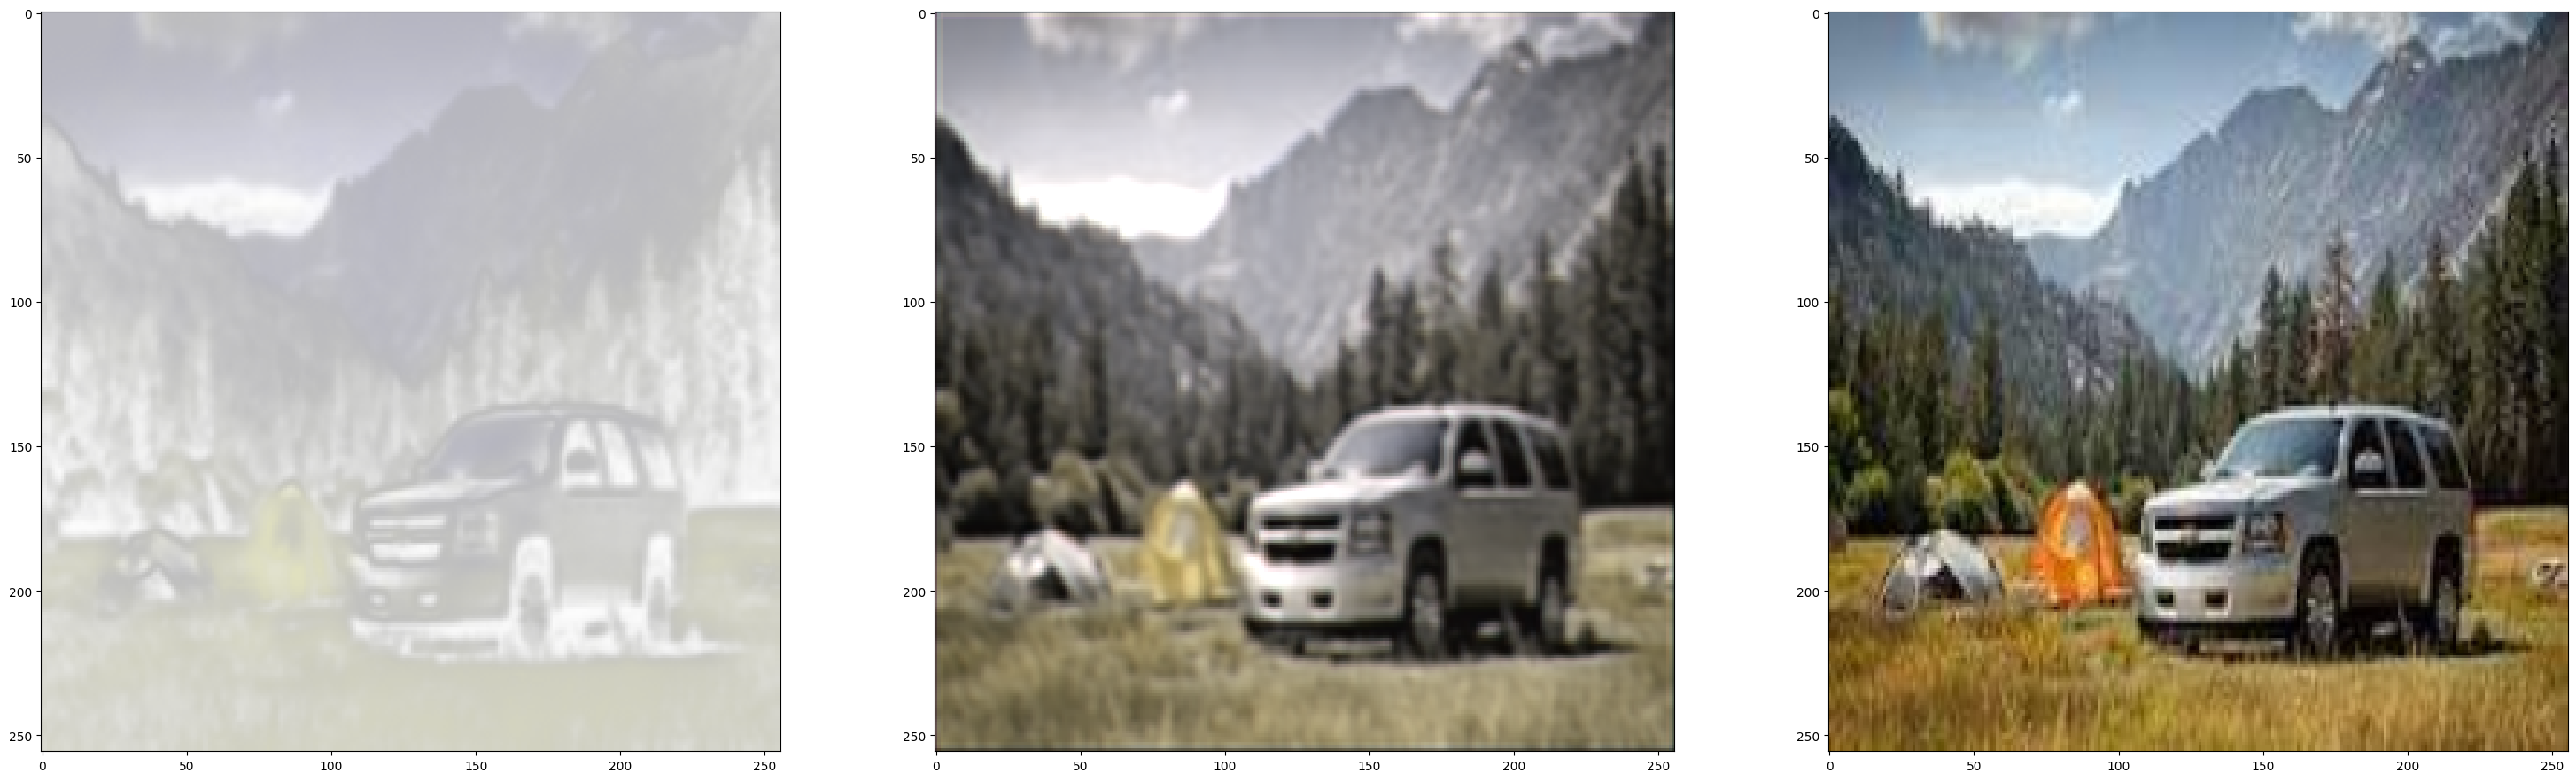

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_down[image_index])  #Input (low-res)
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr1[image_index])  # Output (supre-res recovered image)
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_n[image_index])  # Ground truth (high-res) 
plt.show()


## Loss Metrics

Mean Squared Error (MSE):

In [15]:
def mse(orig, res):
    return ((orig - res) ** 2).mean()

In [16]:
mse(high_res, low_res)

np.float64(0.0071994664678915335)

Structural Similarity (SSIM):

In [17]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

def compute_ssim(ori, res):
    # Ensure images are in float64 type before passing them to the function
    ori = ori.astype(np.float64)
    res = res.astype(np.float64)
    
    # Define data_range based on image values (e.g., 0 to 1 if rescaled)
    data_range = np.max(ori) - np.min(ori) if np.max(ori) != np.min(ori) else 1.0
    
    try:
        # Assuming images are grayscale; set multichannel=True if working with color images
        return ssim(ori, res, 
                    win_size=1, 
                    sigma=1.5, 
                    multichannel=True,  # Change to True for color images
                    data_range=data_range)
    except ZeroDivisionError:
        return 0  # Handle division by zero in case of no variance

# Usage example
ssim_score = compute_ssim(high_res, low_res)
print(f"SSIM Score: {ssim_score}")


SSIM Score: 0


Peak Signal to Noise Ration (PSNR):

In [18]:
from skimage.metrics import peak_signal_noise_ratio

def compute_psnr(ori, res):
    return peak_signal_noise_ratio(ori, res, data_range=1.)

# Usage example
psnr_score = compute_psnr(high_res, low_res)
print(f"PSNR Score: {psnr_score}")



PSNR Score: 21.42699686712635


HFENN (High Frequency Error Norm Normalized)

In [19]:
import numpy as np
from scipy.ndimage import gaussian_laplace  # Importing directly from ndimage

def l_o_g(img, sigma):
    '''
    Laplacian of Gaussian filter (channel-wise)
    -> img: input image
    -> sigma: gaussian_laplace sigma
    <- filtered image
    '''
    while len(img.shape) < 3:
        img = img[..., np.newaxis]  # Ensuring the image has a channel dimension (3D)
    out = img.copy()
    for chan in range(img.shape[2]):
        # Use the new import: gaussian_laplace
        out[..., chan] = gaussian_laplace(img[..., chan], sigma)
    return out

def hfenn(orig, res):
    '''
    High Frequency Error Norm (Normalized) metric for comparison of original and result images
    The metric is independent of image size (in contrast to regular HFEN)
    Inputs are expected to be float in range [0, 1] (with possible overflow)
    -> ori: original image
    -> res: result image
    <- HFENN value
    '''
    sigma = 1.5  # From DLMRI paper
    return np.mean((l_o_g(orig - res, sigma)) ** 2) * 1e4  # magnification

# Example usage: Call hfenn with high_res and low_res images
hfenn(high_res, low_res)


np.float64(0.47988604690338366)

## Combining Loss Functions

### MSE and HFENN

In [20]:
import scipy.ndimage as nd
import scipy.ndimage.filters as filters
from keras import losses
import tensorflow as tf

def hfenn_loss(ori, res):
    '''
    HFENN-based loss
    ori, res - batched images with 3 channels
    See metrics.hfenn
    '''
    fnorm = 0.325 # norm of l_o_g operator, estimated numerically
    sigma = 1.5 # parameter from HFEN metric
    truncate = 4 # default parameter from filters.gaussian_laplace
    wradius = int(truncate * sigma + 0.5)
    eye = np.zeros((2*wradius+1, 2*wradius+1), dtype=np.float32)
    eye[wradius, wradius] = 1.
    ker_mat = filters.gaussian_laplace(eye, sigma)
    with tf.name_scope('hfenn_loss'):
        chan = 3
        ker = tf.constant(np.tile(ker_mat[:, :, None, None], (1, 1, chan, 1)))
        filtered = tf.nn.depthwise_conv2d(ori - res, ker, [1, 1, 1, 1], 'VALID')
        loss = tf.reduce_mean(tf.square(filtered))
        loss = loss / (fnorm**2)
    return loss
  

def ae_loss(input_img, decoder):
    mse = losses.mean_squared_error(input_img, decoder) # MSE
    weight = 10.0 # weight
    return mse + weight * hfenn_loss(input_img, decoder) # MSE + weight * HFENN


In [21]:
autoencoder.compile(optimizer='adadelta', loss=ae_loss)

In [22]:
## TODO
## download the weights

autoencoder_hfenn.load_weights("/Users/manojkumar/Downloads/weights/sr.img_net.mse_hfenn.final_model5_2.no_patch.weights.best.hdf5")

In [23]:
sr_hfenn = np.clip(autoencoder_hfenn.predict(x_train_down_rgb), 0.0, 1.0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step


Display the image results:

* The low resolution input image
* A bicubic interopolated version
* The reconstructed image with MSE
* The reconstructed image with our custom MSE + HFENN loss
* The original perfect image

In [24]:
image_index = 99

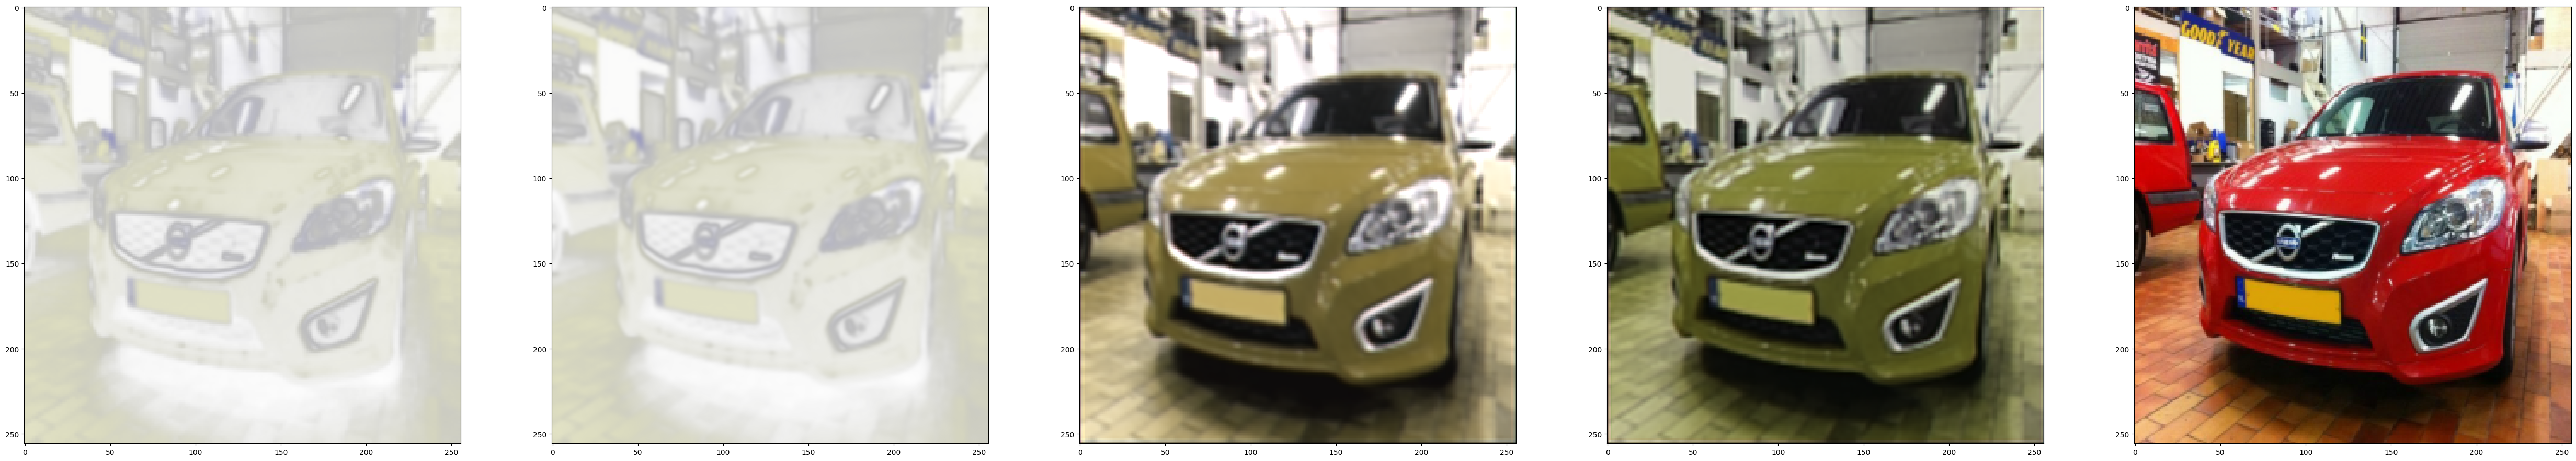

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_down[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_down[image_index], interpolation="bicubic")
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr1[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_hfenn[image_index])  # The reconstructed image with our custom MSE + HFENN loss
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_n[image_index])
plt.show()

If you look a bit closely and check out the lines and edges, you'll se that they're sharper when using MSE and HFENN compared to MSE alone.

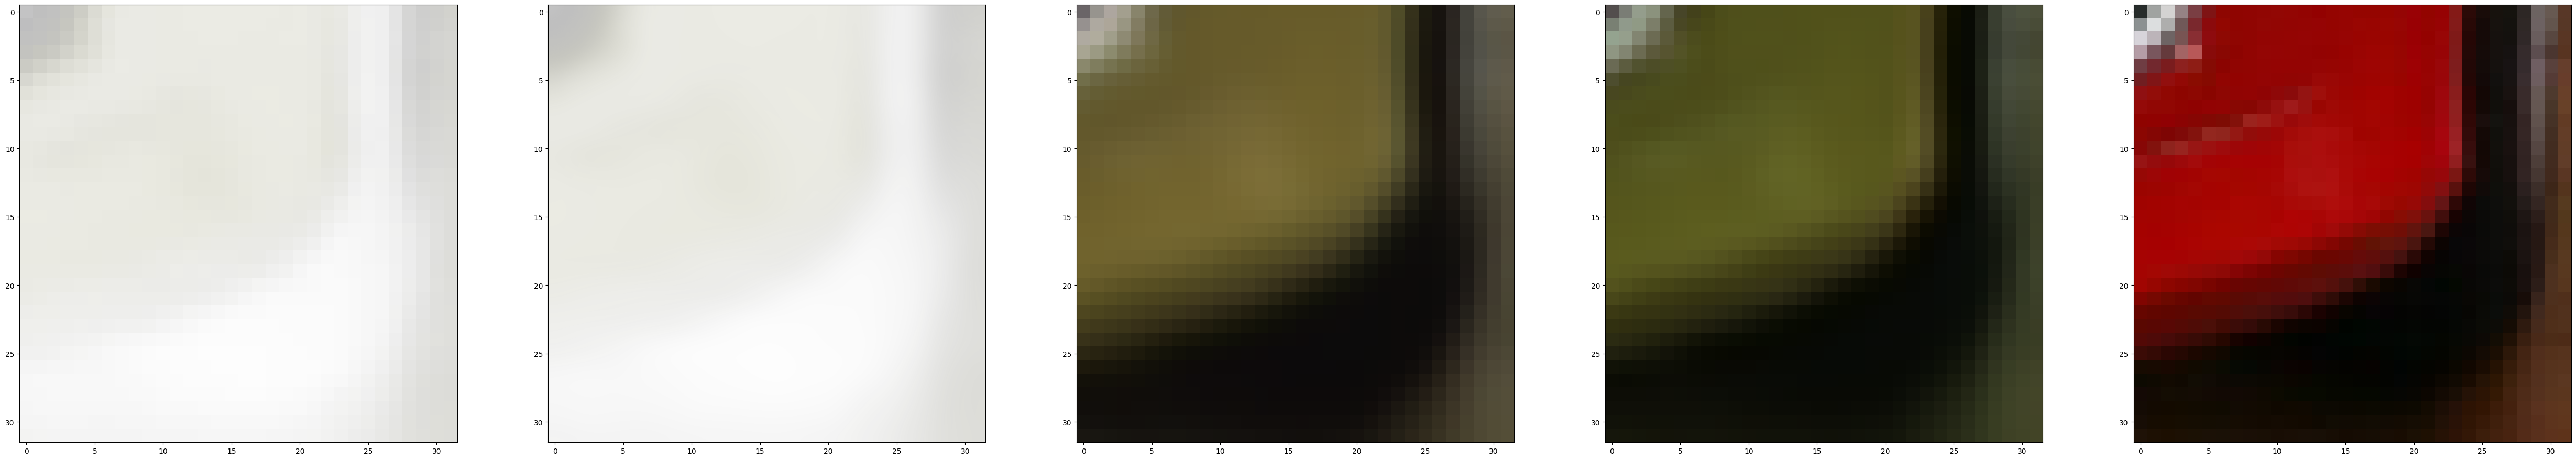

In [26]:
plt.figure(figsize=(128, 128))
j = 6
i = 1
idx_1 = 32*j
idx_2 = 32*(j+1)
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_down[image_index, idx_1:idx_2, idx_1:idx_2])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_down[image_index, idx_1:idx_2, idx_1:idx_2], interpolation="bicubic")
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr1[image_index, idx_1:idx_2, idx_1:idx_2])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_hfenn[image_index, idx_1:idx_2, idx_1:idx_2])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(x_train_n[image_index, idx_1:idx_2, idx_1:idx_2])
plt.show()

## Classification Report

In [49]:
import tensorflow as tf

# Define the path to the dataset
dataset_path1 = '/Users/manojkumar/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_train'

# Load the dataset, resizing images to 32x32 to match the model input
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path1,
    image_size=(32, 32),  # Resize to 32x32 to match the model input
    batch_size=32,         # Adjust batch size as needed
    shuffle=False          # For predictions, do not shuffle
)

# Normalize the data (if required by your model)
normalization_layer1 = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer1(x), y))

# Generate predictions
predictions = model.predict(train_data)

# Example: Interpret predictions (if it's a classification model)
true_classes = tf.argmax(predictions, axis=1)
print("True Classes:", true_classes.numpy())


Found 8144 files belonging to 1 classes.
255/255 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step
True Classes: [[[30 30 16]
  [29 29 29]
  [28 28 28]
  ...
  [19 19 19]
  [ 2  2  2]
  [13  1 13]]

 [[18  4  4]
  [ 8  4  4]
  [14 14 14]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  2  2]
  [ 1  1  1]
  [ 0  0  0]
  ...
  [ 5  5  2]
  [ 3  3  3]
  [12 12  3]]

 ...

 [[31 31 31]
  [30 22 30]
  [21 21 21]
  ...
  [16 16 16]
  [31 31 31]
  [31 31 31]]

 [[18 19 19]
  [19 19 19]
  [21 15 15]
  ...
  [20 20 20]
  [19 19 19]
  [19 19 19]]

 [[28 28 28]
  [24 24 24]
  [23 23 23]
  ...
  [15 15 15]
  [15 15 15]
  [19 21 18]]]


In [48]:
import tensorflow as tf

# Define the path to the dataset
dataset_path = '/Users/manojkumar/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_test'

# Load the dataset, resizing images to 32x32 to match the model input
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(32, 32),  # Resize to 32x32 to match the model input
    batch_size=32,         # Adjust batch size as needed
    shuffle=False          # For predictions, do not shuffle
)

# Normalize the data (if required by your model)
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

# Generate predictions
predictions = model.predict(test_data)

# Example: Interpret predictions (if it's a classification model)
predicted_classes = tf.argmax(predictions, axis=1)
print("Predicted Classes:", predicted_classes.numpy())


Found 8041 files belonging to 1 classes.
252/252 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step
Predicted Classes: [[[17 19 17]
  [17 17 19]
  [16 16 16]
  ...
  [21 21 22]
  [31 15 14]
  [30  0  0]]

 [[18 18 18]
  [11 11 11]
  [28 28 28]
  ...
  [22 22 22]
  [10  9 10]
  [20 20 20]]

 [[15 15 15]
  [15 14 14]
  [21 21 21]
  ...
  [ 9  9  9]
  [ 9  9  9]
  [10 10 10]]

 ...

 [[22 23 21]
  [21 21 23]
  [24 24 24]
  ...
  [15 15 15]
  [ 4  4  4]
  [18 18  3]]

 [[11  9  8]
  [11  9  8]
  [11 11 20]
  ...
  [ 7  7  7]
  [ 7  7  7]
  [ 6  6 31]]

 [[16 16 16]
  [16 16 16]
  [16 17 17]
  ...
  [18 18 18]
  [18 18 18]
  [19 19 19]]]


In [ ]:
import numpy as np

num_labels_to_flip = int(0.1 * len(true_classes))  # Flip 10% of the labels
indices_to_flip = np.random.choice(len(true_classes), num_labels_to_flip, replace=False)

unique_classes = np.unique(true_classes)
for idx in indices_to_flip:
    true_classes[idx] = np.random.choice(unique_classes)

# Now calculate the classification report with noisy labels
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))


              precision    recall  f1-score   support

           0       0.93      0.96      0.95   3845996
           1       0.93      0.84      0.88   1449140
           2       0.93      0.94      0.94   3044320

    accuracy                           0.93   8339456
   macro avg       0.93      0.91      0.92   8339456
weighted avg       0.93      0.93      0.93   8339456

